# <center> <u> <font color='brown'>Sleep Health and Lifestyle Dataset - Classification

<b>The Sleep Health and Lifestyle Dataset comprises 375 rows and 13 columns, covering a wide range of variables related to sleep and daily habits.
    
<b>It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders. 

<b> Here we will use the "Sleep_health_and_lifestyle_dataset.csv" database that has been made available for use, below you will see an analysis of the data, the processing of this data and the use of the learning classification of machine models to achieve our goal.¶


#### Dataset taken from Kaggle : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.preprocessing import LabelEncoder,StandardScaler,label_binarize
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC,SVC
import pickle
import flask
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')

In [3]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


### Dropping the Person ID column

In [8]:
data.drop(columns='Person ID', inplace=True)

In [9]:
data.rename(columns={'Sleep Duration':'Sleep_Duration','BMI Category':'BMI_Category', 'Sleep Disorder':'Sleep_Disorder' ,
                     'Quality of Sleep':'Quality_of_Sleep','Physical Activity Level':'Physical_Activity_Level',
                   'Stress Level':'Stress_Level','Heart Rate':'Heart_Rate', 'Daily Steps':'Daily_Steps'}, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep_Duration           374 non-null    float64
 4   Quality_of_Sleep         374 non-null    int64  
 5   Physical_Activity_Level  374 non-null    int64  
 6   Stress_Level             374 non-null    int64  
 7   BMI_Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart_Rate               374 non-null    int64  
 10  Daily_Steps              374 non-null    int64  
 11  Sleep_Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


### Profession wise categories

In [11]:
data.Occupation.value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

### BMI Categories

In [12]:
data.BMI_Category.value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI_Category, dtype: int64

### Types of Sleep Disorder

In [13]:
data.Sleep_Disorder.value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep_Disorder, dtype: int64

In [14]:
data.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Univariate Analysis

### Histogram

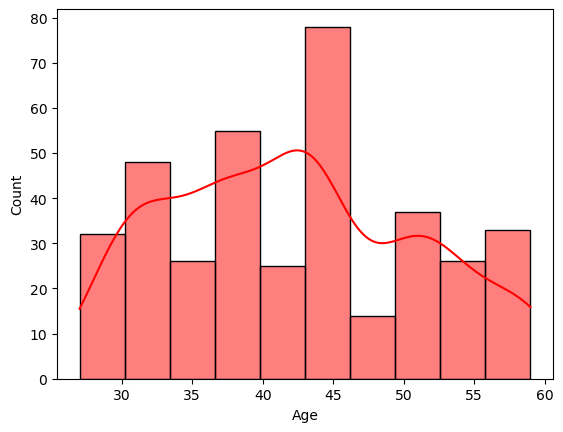

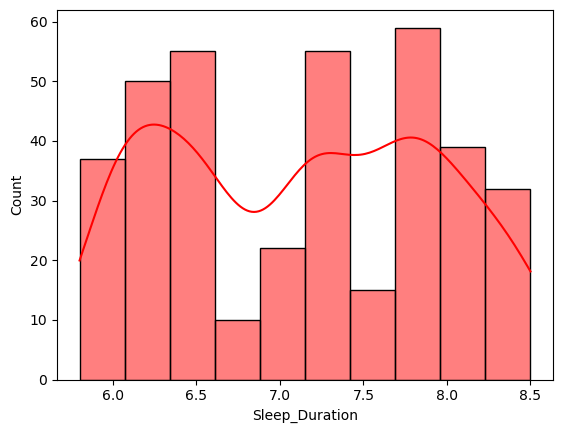

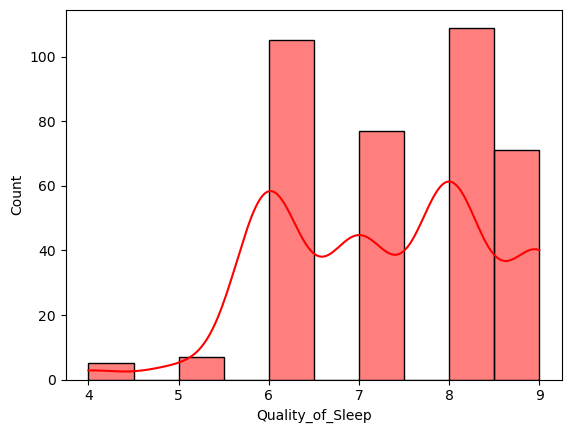

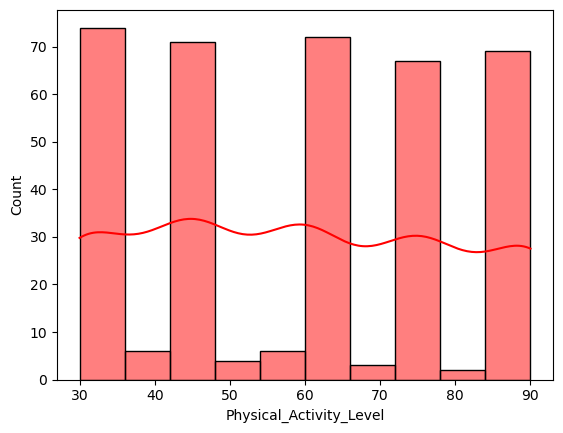

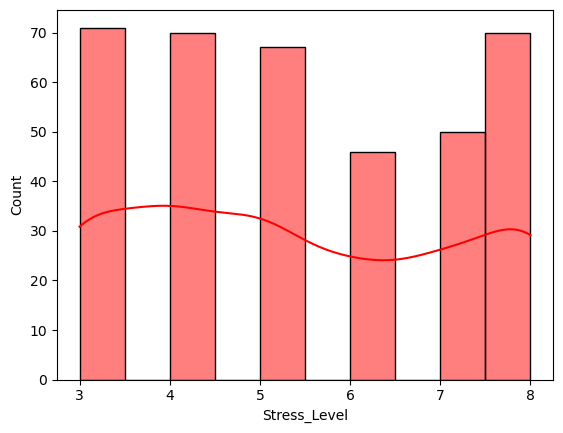

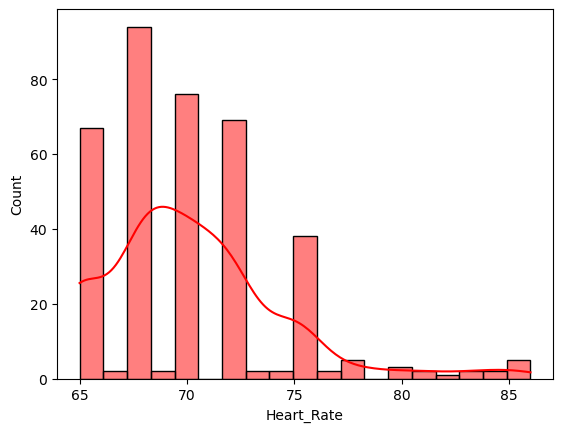

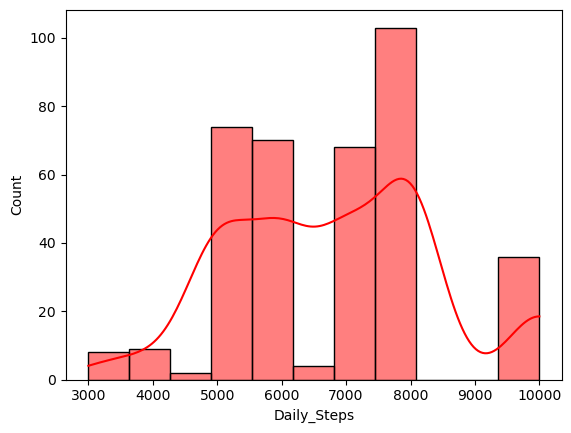

In [15]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(data=data, x=data[i], kde=True, color='red')
        plt.show()

### Box plot

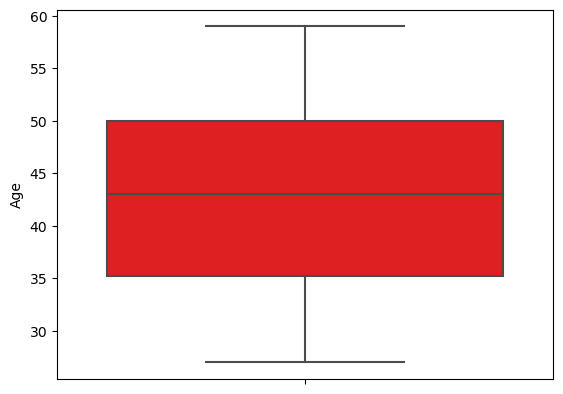

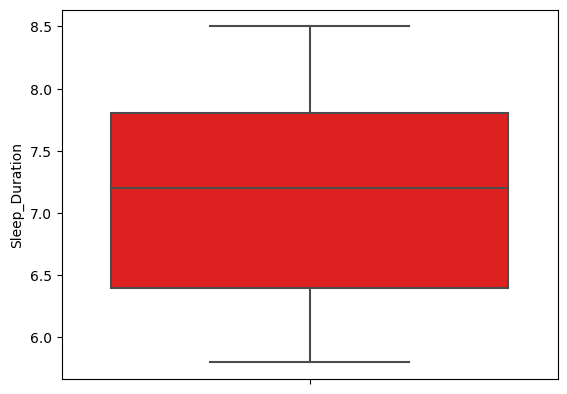

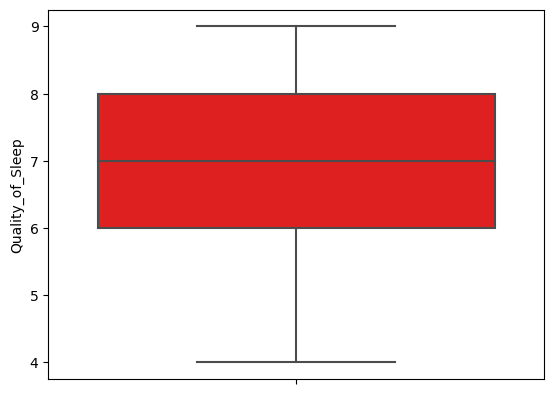

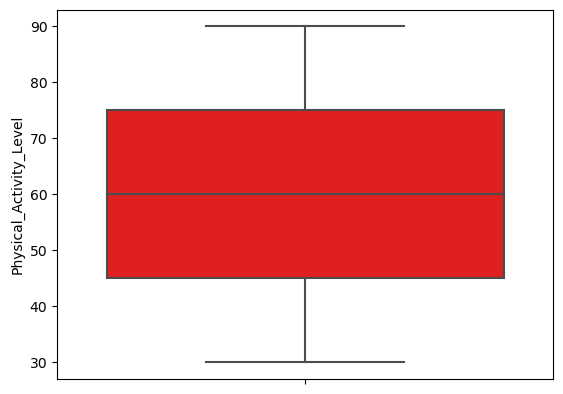

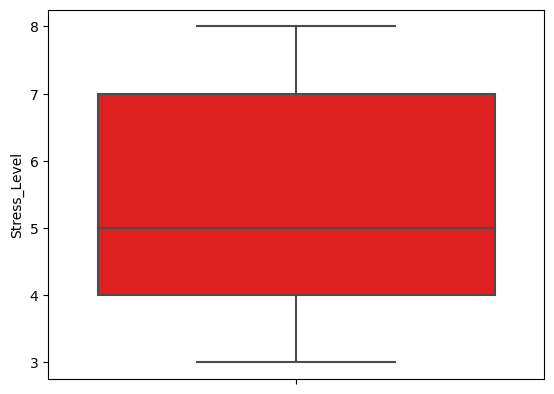

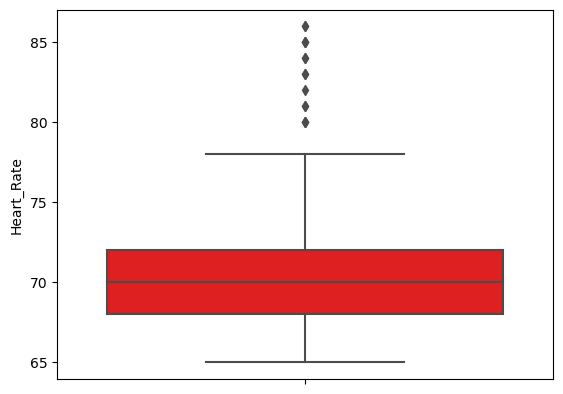

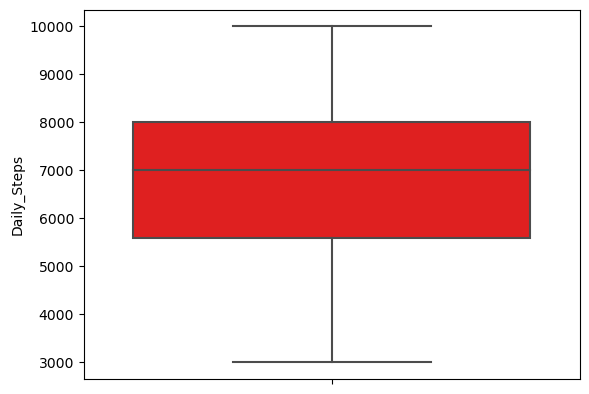

In [16]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(data=data, y=data[i], color='red')
        plt.show()

In [17]:
column=['Heart_Rate']

In [18]:
def outlier_limit(column):
    Q3,Q1 = np.nanpercentile(column,[75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL,LL

In [19]:
for i in column:
    UL,LL = outlier_limit(data[i])
    data[i] = np.where((data[i]>UL) | (data[i]<LL),np.nan,data[i])

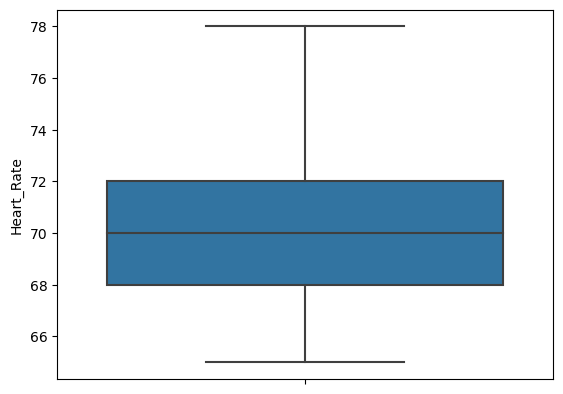

In [20]:
for i in column:
    sns.boxplot(y=data[i])
    plt.show()

In [21]:
data.dropna(inplace=True)

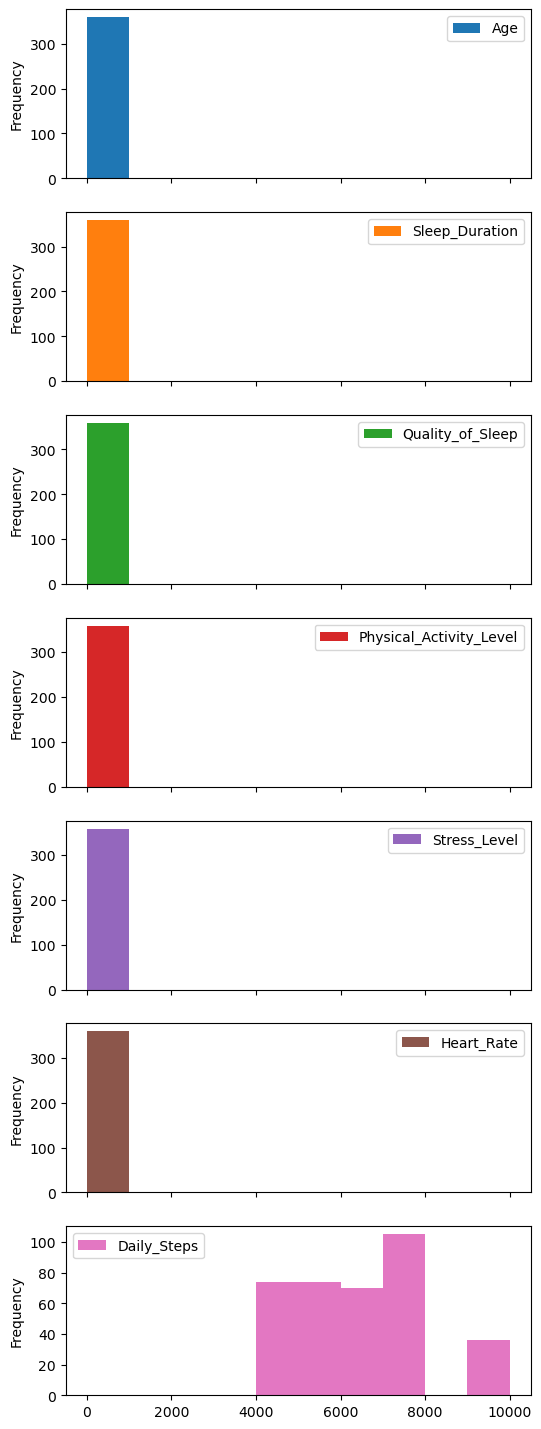

In [22]:
data.plot.hist(figsize=(6,18), subplots=True);

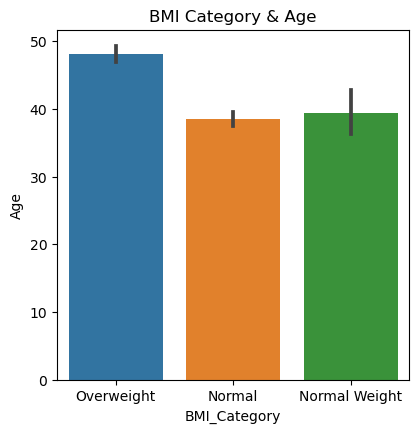

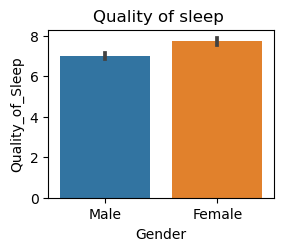

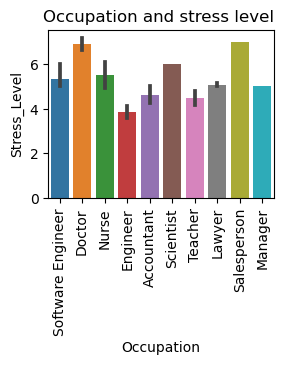

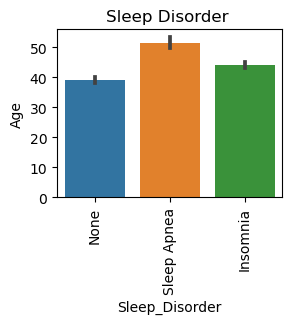

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.barplot(data=data, x='BMI_Category', y='Age')
plt.title("BMI Category & Age")
plt.show()

#plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.barplot(data=data, x='Gender', y='Quality_of_Sleep')
plt.title("Quality of sleep ")
plt.show()

#plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.barplot(data=data, x='Occupation', y='Stress_Level')
plt.xticks(rotation=90)
plt.title("Occupation and stress level ")
plt.show()

#plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.barplot(data=data, x='Sleep_Disorder', y='Age')
plt.xticks(rotation=90)
plt.title("Sleep Disorder ")
plt.show()

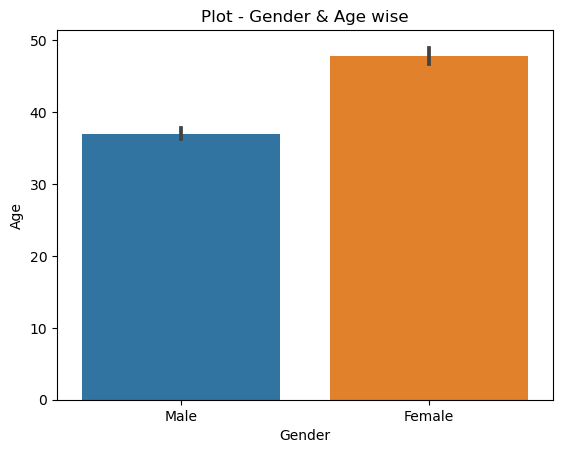

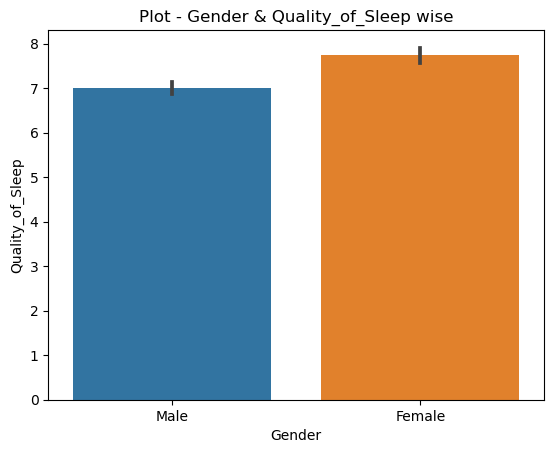

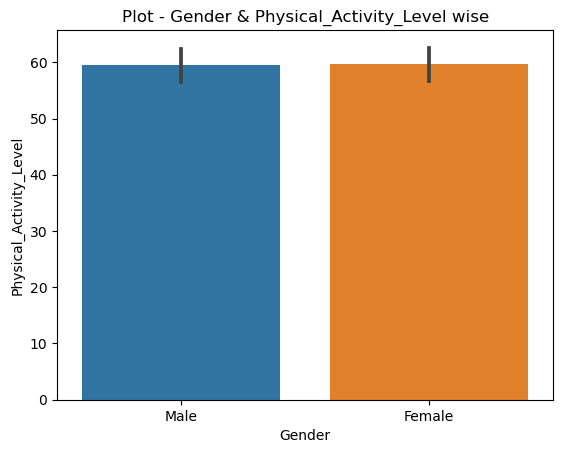

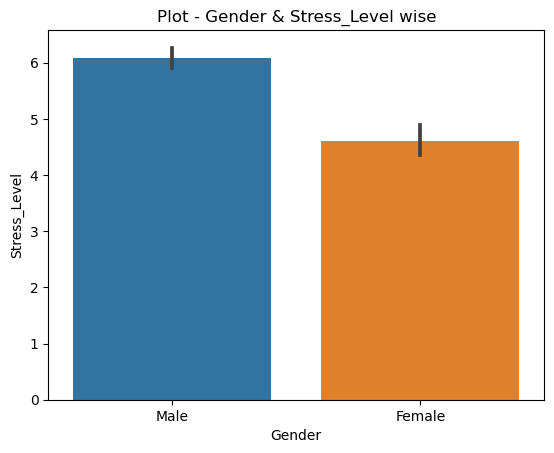

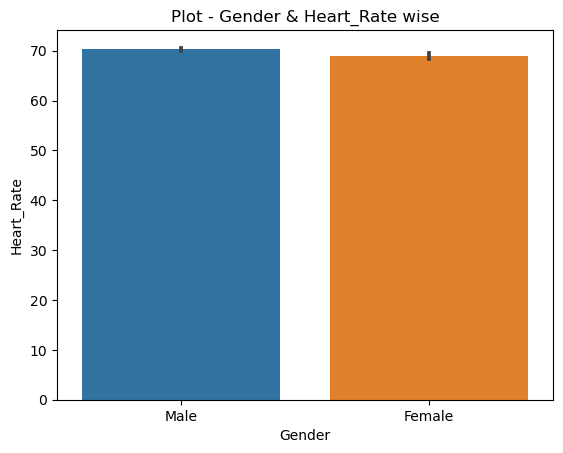

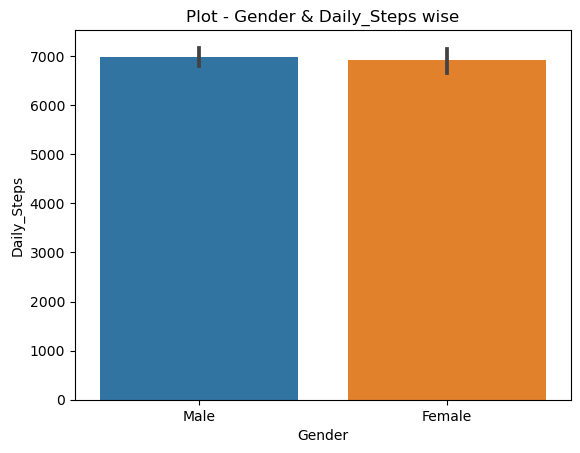

In [24]:
column= ['Age','Quality_of_Sleep', 'Physical_Activity_Level','Stress_Level','Heart_Rate','Daily_Steps']
for i in column:
    plt.title("Plot - Gender & {} wise".format(i))
    sns.barplot(data=data, x='Gender', y=data[i] )
    plt.show()

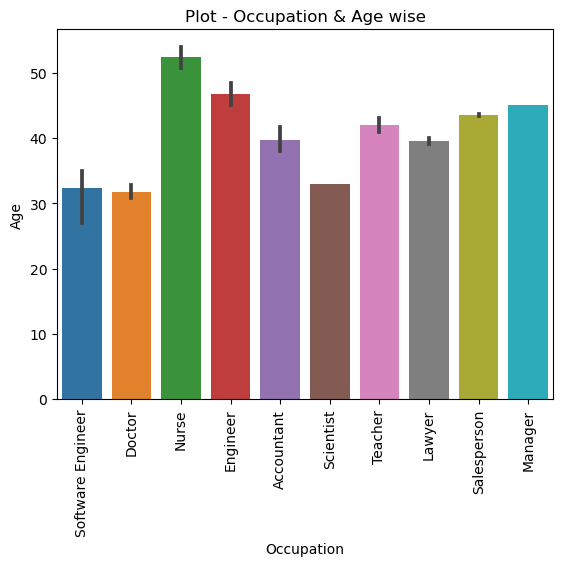

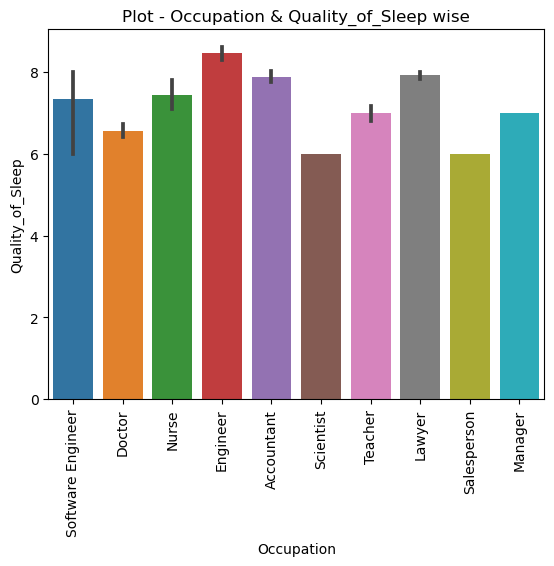

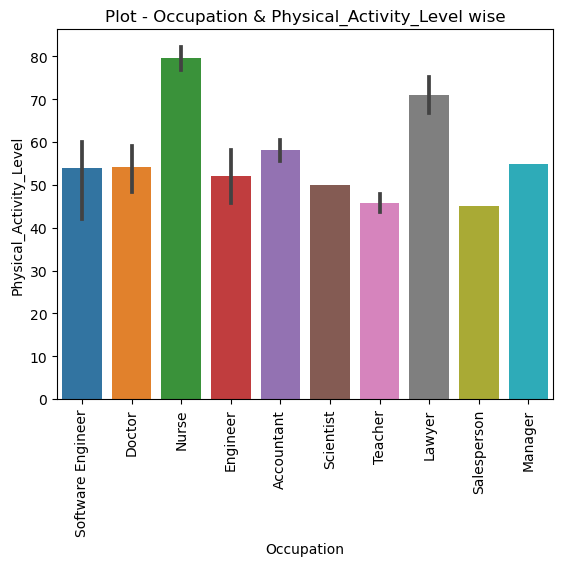

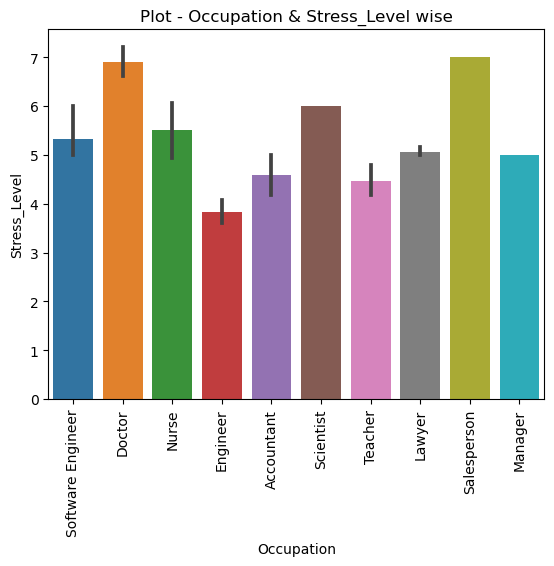

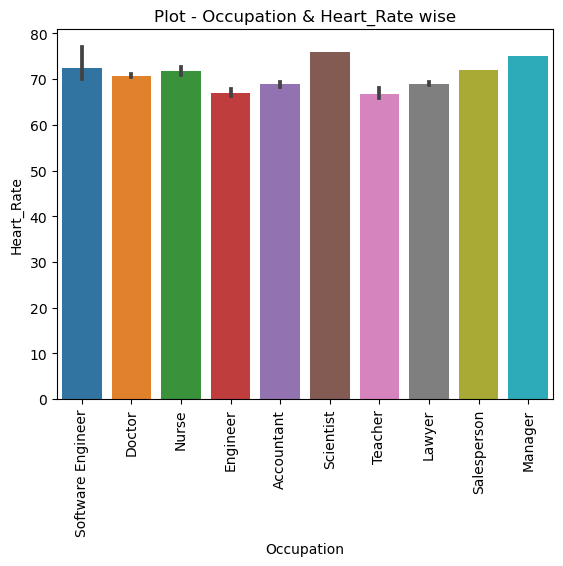

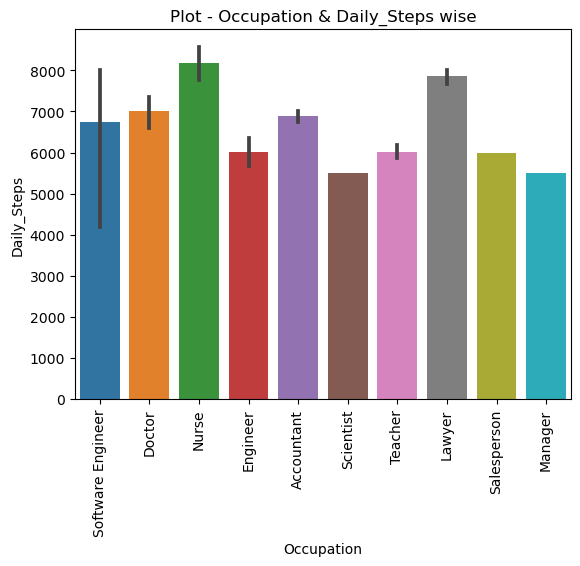

In [25]:
column= ['Age','Quality_of_Sleep', 'Physical_Activity_Level','Stress_Level','Heart_Rate','Daily_Steps']
for i in column:
    plt.title("Plot - Occupation & {} wise".format(i))
    plt.xticks(rotation=90)
    sns.barplot(data=data, x='Occupation', y=data[i])
    plt.show()

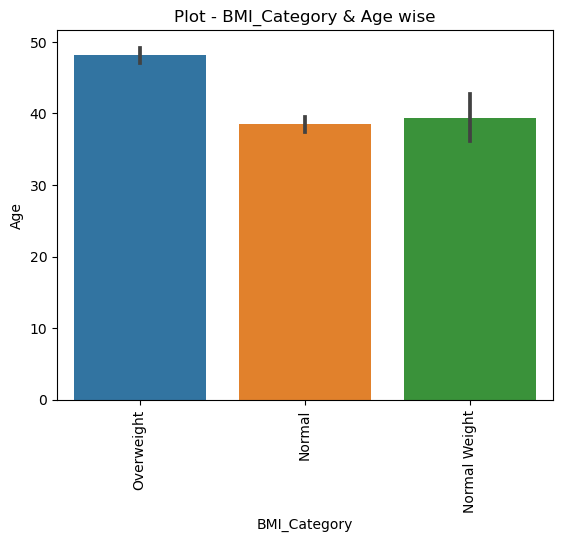

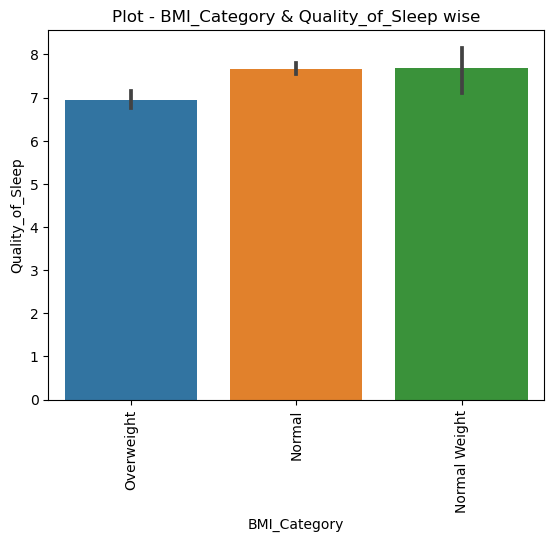

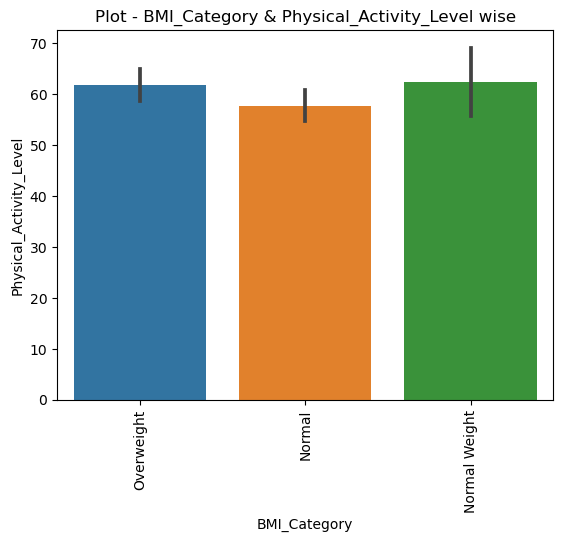

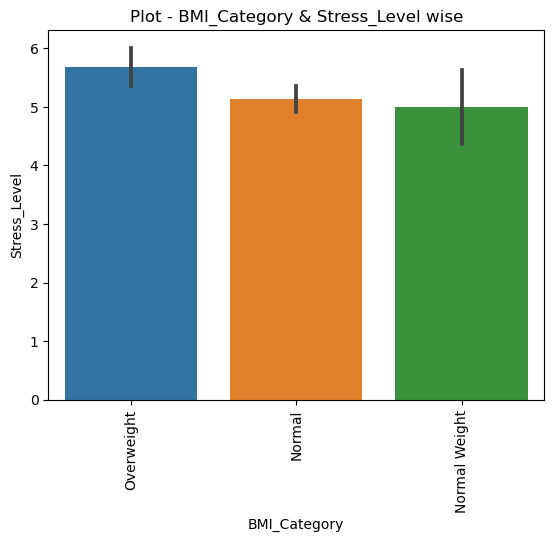

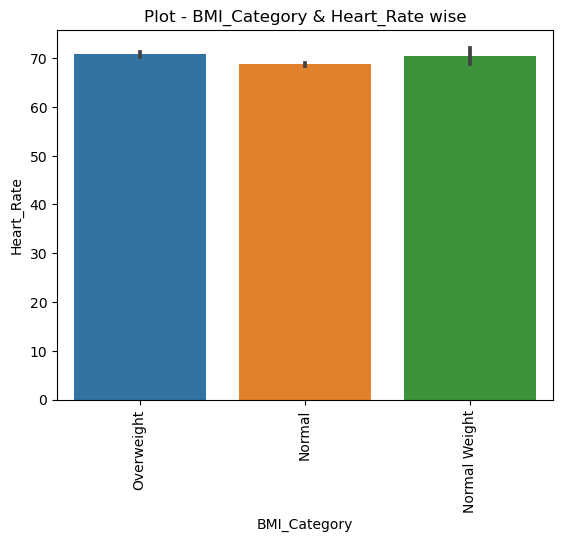

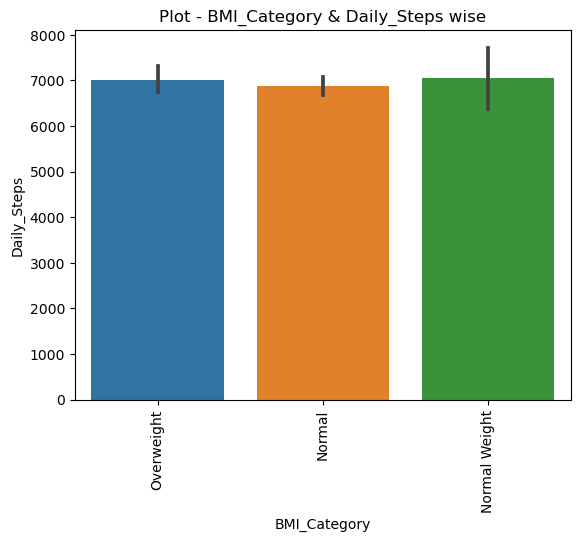

In [26]:
column= ['Age','Quality_of_Sleep', 'Physical_Activity_Level','Stress_Level','Heart_Rate','Daily_Steps']
for i in column:
    plt.xticks(rotation=90)
    plt.title("Plot - BMI_Category & {} wise".format(i))
    sns.barplot(data=data, x='BMI_Category', y=data[i])
    plt.show()

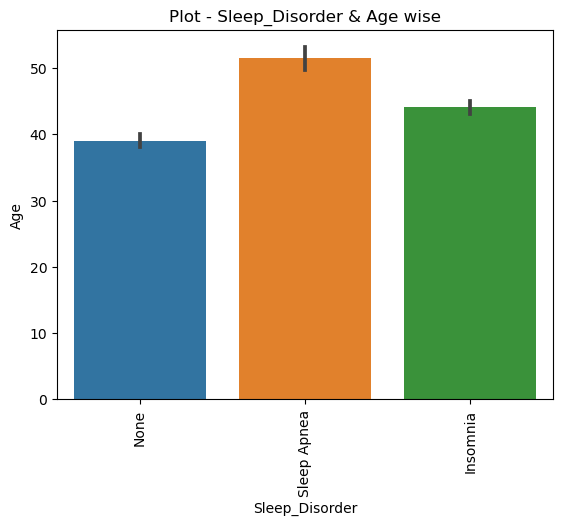

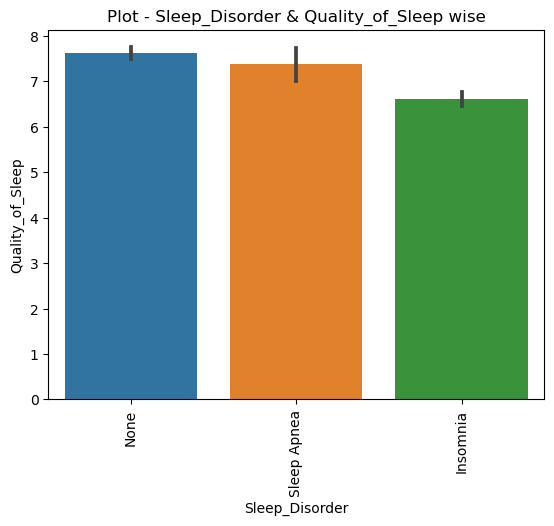

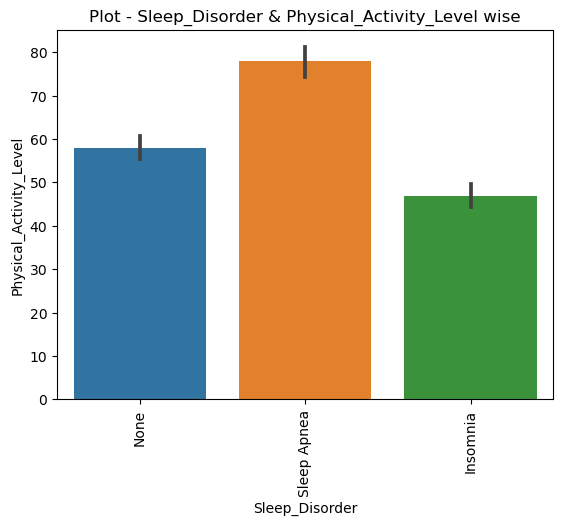

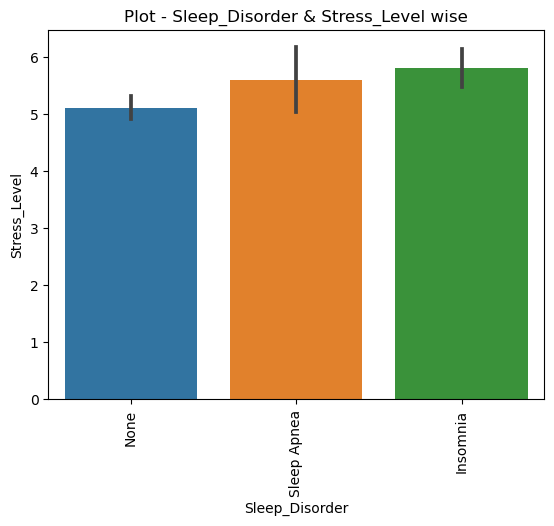

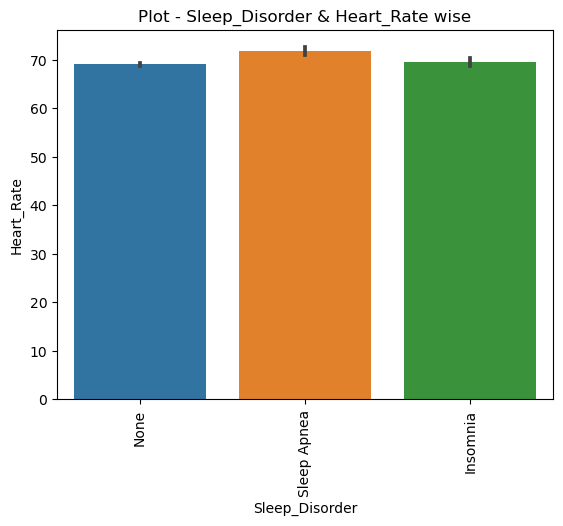

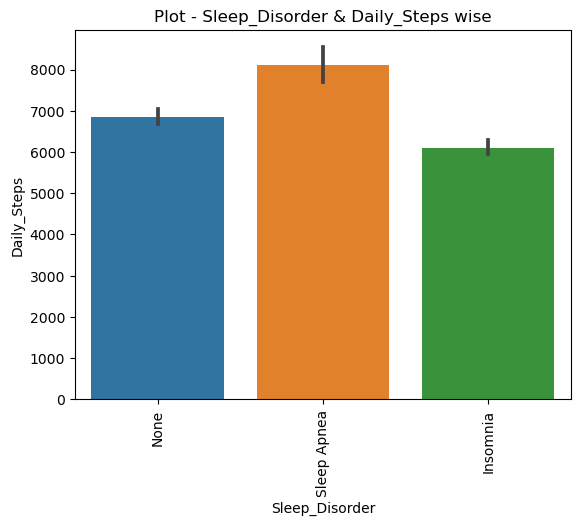

In [27]:
column= ['Age','Quality_of_Sleep', 'Physical_Activity_Level','Stress_Level','Heart_Rate','Daily_Steps']
for i in column:
    plt.xticks(rotation=90)
    plt.title("Plot - Sleep_Disorder & {} wise".format(i))
    sns.barplot(data=data, x='Sleep_Disorder', y=data[i])
    plt.show()

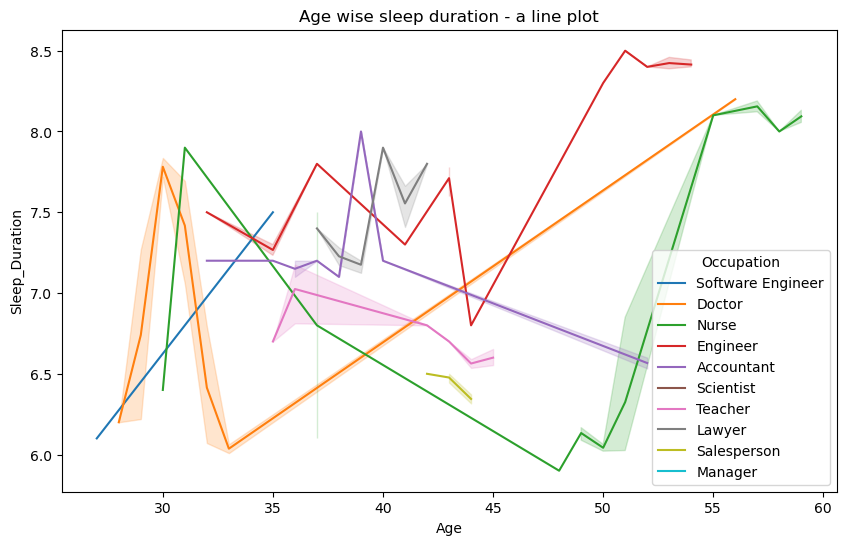

In [28]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Sleep_Duration')
plt.title("Age wise sleep duration - a line plot")
sns.lineplot(data=data, x='Age', y='Sleep_Duration', hue='Occupation')
plt.show()

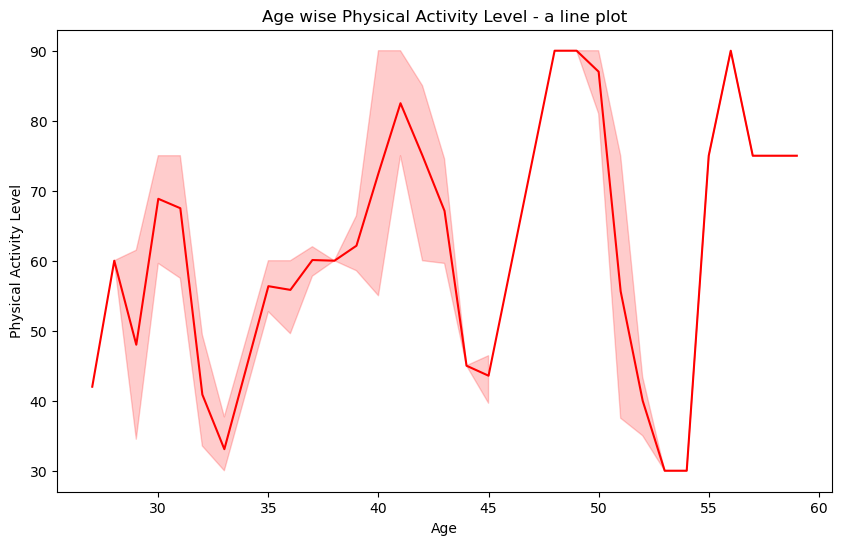

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Physical Activity Level')
plt.title("Age wise Physical Activity Level - a line plot")
sns.lineplot(data=data, x='Age', y='Physical_Activity_Level', color='red')
plt.show()

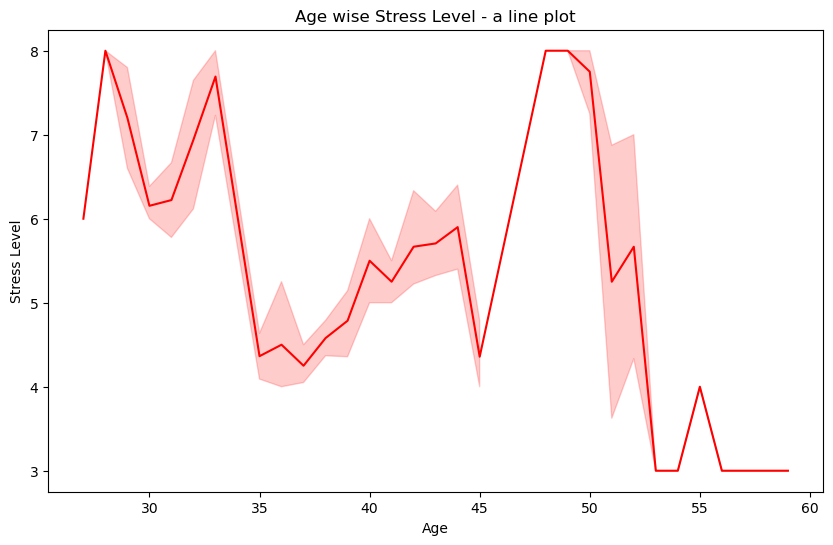

In [30]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title("Age wise Stress Level - a line plot")
sns.lineplot(data=data, x='Age', y='Stress_Level', color='red')
plt.show()

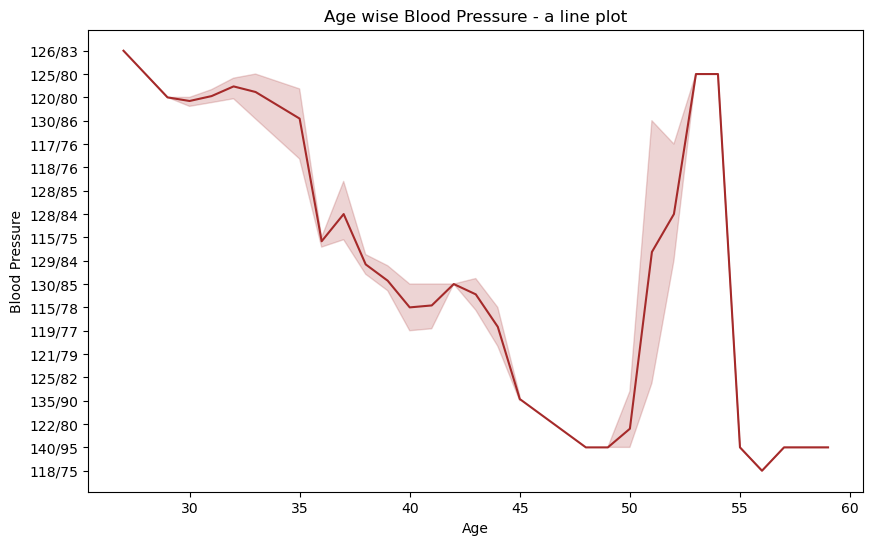

In [31]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title("Age wise Blood Pressure - a line plot")
sns.lineplot(data=data, x='Age', y='Blood Pressure', color='Brown')
plt.show()

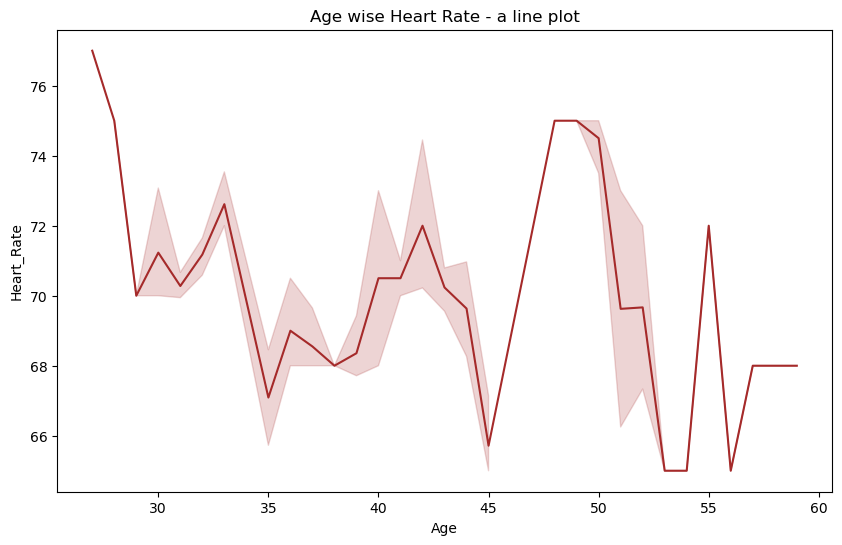

In [32]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Heart_Rate')
plt.title("Age wise Heart Rate - a line plot")
sns.lineplot(data=data, x='Age', y='Heart_Rate', color='Brown')
plt.show()

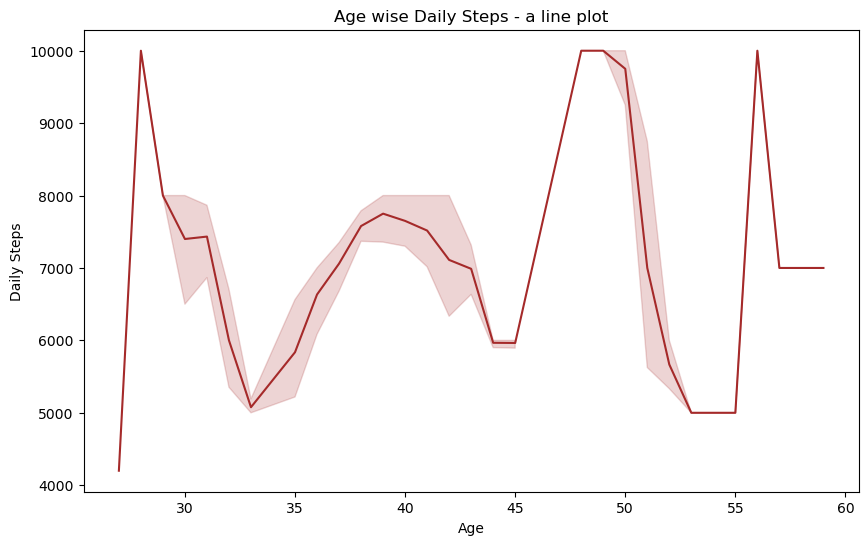

In [33]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Daily Steps')
plt.title("Age wise Daily Steps - a line plot")
sns.lineplot(data=data, x='Age', y='Daily_Steps', color='brown')
plt.show()

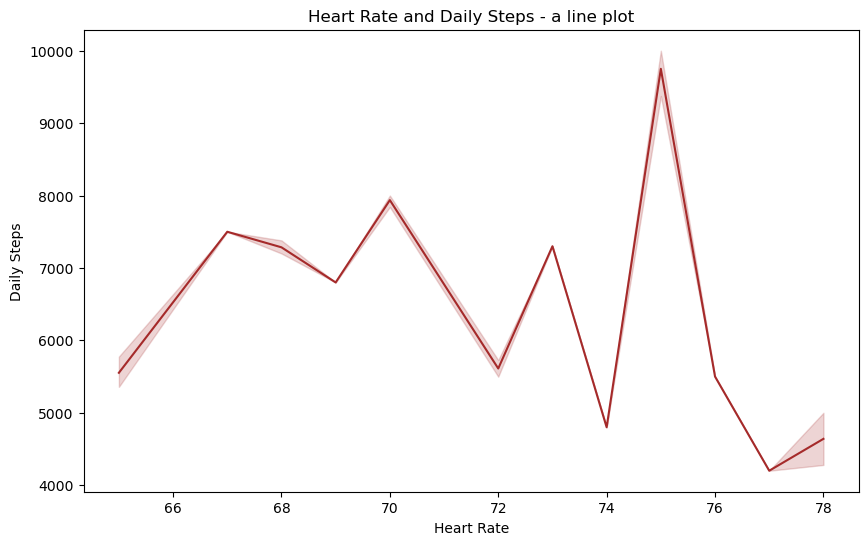

In [34]:
plt.figure(figsize=(10,6))
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.title("Heart Rate and Daily Steps - a line plot")
sns.lineplot(data=data, x='Heart_Rate', y='Daily_Steps', color='brown')
plt.show()

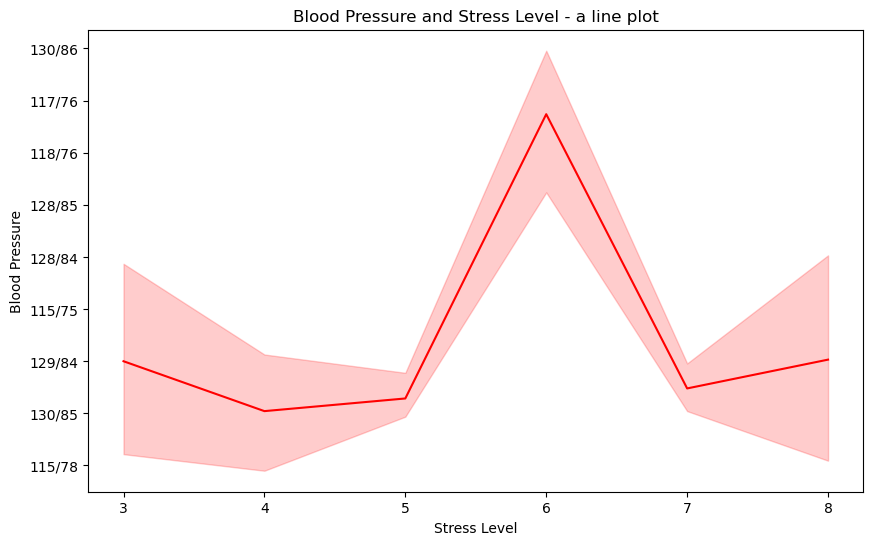

In [35]:
plt.figure(figsize=(10,6))
plt.ylabel('Blood Pressure')
plt.xlabel('Stress Level')
plt.title("Blood Pressure and Stress Level - a line plot")
sns.lineplot(data=data,  x='Stress_Level', y='Blood Pressure',  color='red')
plt.show()

In [36]:
data[['BP High', 'BP Low']] = data['Blood Pressure'].str.split('/', expand=True)
data.drop('Blood Pressure', axis=1, inplace=True)
data.head(3)

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP High,BP Low
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80


In [38]:
data['BP High'] = data['BP High'].astype(int)
data['BP Low'] = data['BP Low'].astype(int)

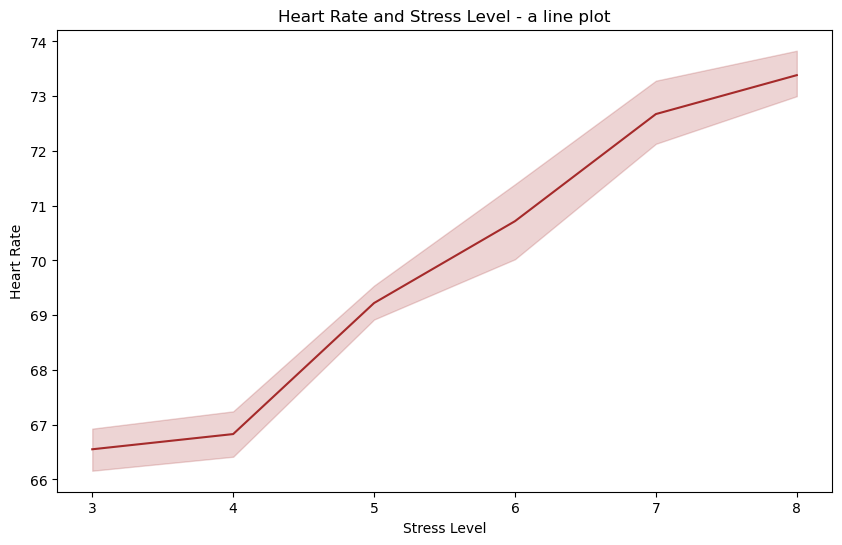

In [39]:
plt.figure(figsize=(10,6))
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate')
plt.title("Heart Rate and Stress Level - a line plot")
sns.lineplot(data=data,  x='Stress_Level', y='Heart_Rate',color='brown')
plt.show()

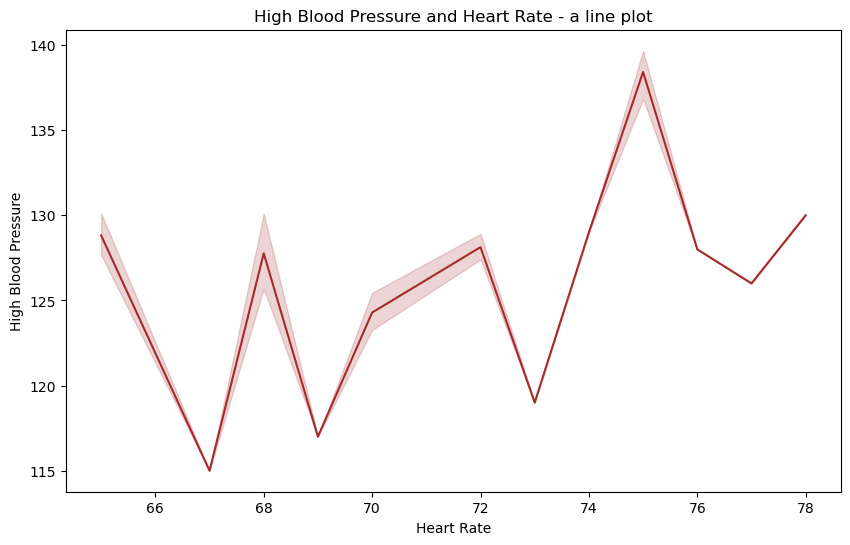

In [40]:
plt.figure(figsize=(10,6))
plt.ylabel('High Blood Pressure')
plt.xlabel('Heart Rate')
plt.title("High Blood Pressure and Heart Rate - a line plot")
sns.lineplot(data=data,  x='Heart_Rate', y='BP High',color='brown')
plt.show()

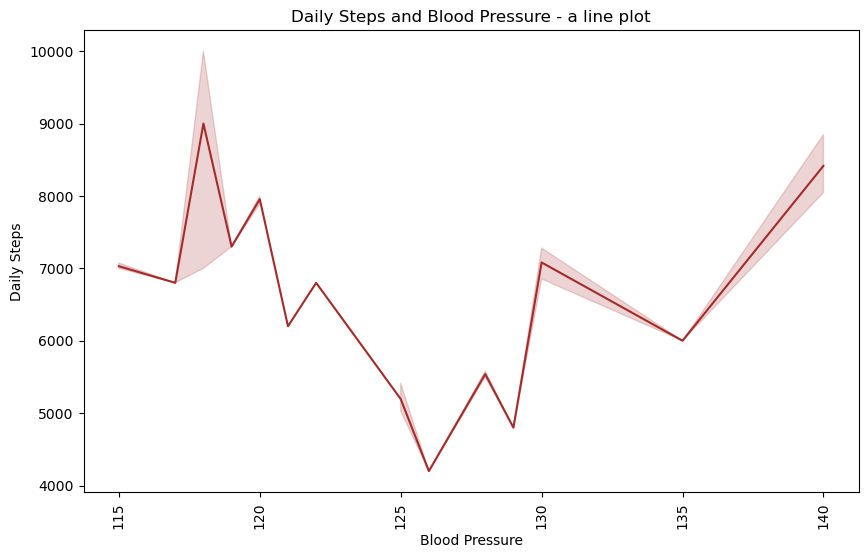

In [42]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.ylabel('Daily Steps')
plt.xlabel('Blood Pressure')
plt.title("Daily Steps and Blood Pressure - a line plot")
sns.lineplot(data=data, y='Daily_Steps', x='BP High', color='Brown')
plt.show()

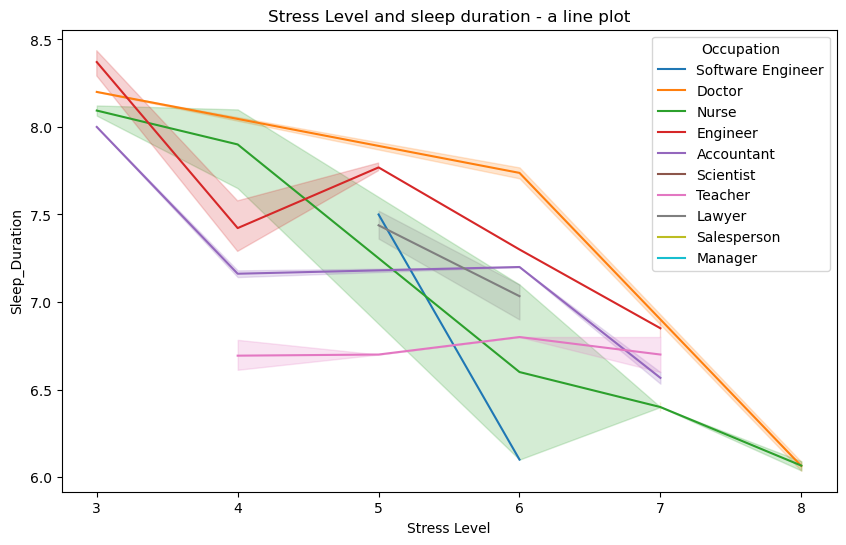

In [43]:
plt.figure(figsize=(10,6))
plt.xlabel('Stress Level')
plt.ylabel('Sleep_Duration')
plt.title("Stress Level and sleep duration - a line plot")
sns.lineplot(data=data, x='Stress_Level', y='Sleep_Duration', hue='Occupation',color='green')
plt.show()

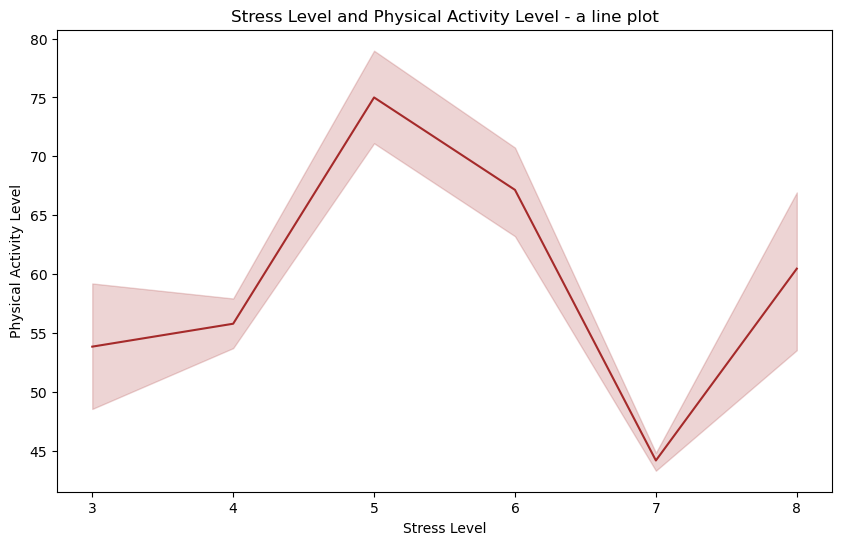

In [44]:
plt.figure(figsize=(10,6))
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity Level')
plt.title("Stress Level and Physical Activity Level - a line plot")
sns.lineplot(data=data, x='Stress_Level', y='Physical_Activity_Level', color='brown')
plt.show()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   359 non-null    object 
 1   Age                      359 non-null    int64  
 2   Occupation               359 non-null    object 
 3   Sleep_Duration           359 non-null    float64
 4   Quality_of_Sleep         359 non-null    int64  
 5   Physical_Activity_Level  359 non-null    int64  
 6   Stress_Level             359 non-null    int64  
 7   BMI_Category             359 non-null    object 
 8   Heart_Rate               359 non-null    float64
 9   Daily_Steps              359 non-null    int64  
 10  Sleep_Disorder           359 non-null    object 
 11  BP High                  359 non-null    int32  
 12  BP Low                   359 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 44.6+ KB


In [46]:
data.head(3)

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP High,BP Low
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80


### Pie Chart

In [47]:
data.Age.value_counts()

43    34
44    30
37    20
50    20
38    19
31    18
53    17
32    17
59    16
39    14
45    14
33    13
30    13
36    12
41    12
35    11
29    10
57     9
52     9
49     9
42     9
51     8
54     7
58     6
40     4
28     2
55     2
56     2
48     1
27     1
Name: Age, dtype: int64

In [48]:
data.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP High,BP Low
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
7,Male,29,Doctor,7.8,7,75,6,Normal,70.0,8000,None,120,80
8,Male,29,Doctor,7.8,7,75,6,Normal,70.0,8000,None,120,80


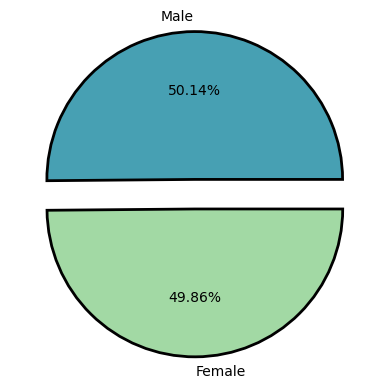

In [49]:
palette_color=sns.color_palette('Spectral_r')
plt.pie(data=data,x=data.Gender.value_counts(),explode=[0.1,0.1],colors=palette_color,autopct='%0.2f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 2,
                    'antialiased': True},labels=['Male','Female'])
plt.show()

In [50]:
data.Occupation.nunique()

10

In [51]:
data.BMI_Category.unique()

array(['Overweight', 'Normal', 'Normal Weight'], dtype=object)

In [52]:
data.Sleep_Disorder.value_counts()

None           219
Insomnia        71
Sleep Apnea     69
Name: Sleep_Disorder, dtype: int64

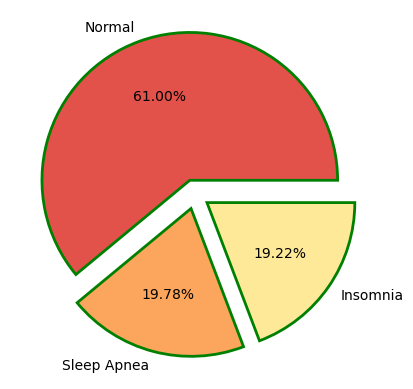

In [53]:
palette_color=sns.color_palette('Spectral')
plt.pie(data=data,x=data.Sleep_Disorder.value_counts(),explode=[0.1,0.1,0.1],colors=palette_color,autopct='%0.2f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "green",
                    'linewidth' : 2,
                    'antialiased': True},labels=['Normal', 'Sleep Apnea', 'Insomnia'])
plt.show()

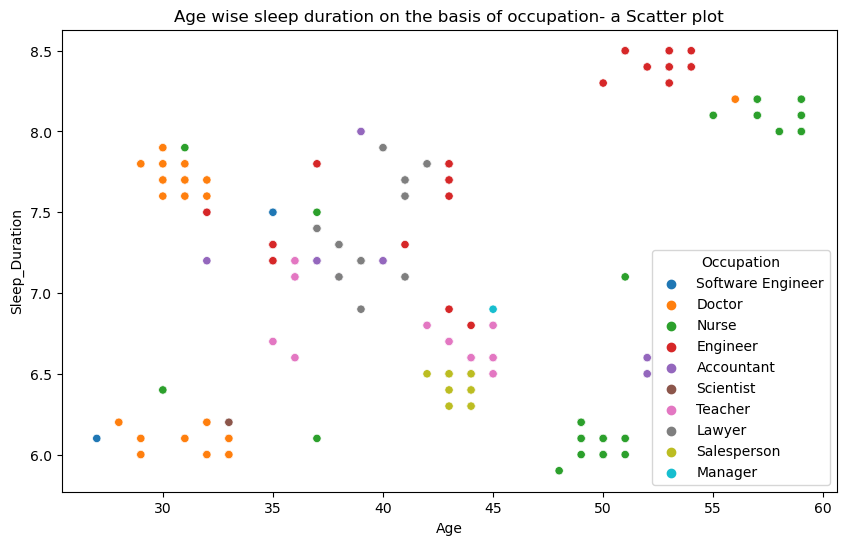

In [54]:
plt.figure(figsize=(10,6))
plt.title("Age wise sleep duration on the basis of occupation- a Scatter plot")
sns.scatterplot(data=data, x='Age', y='Sleep_Duration', hue='Occupation',color='brown')
plt.show()

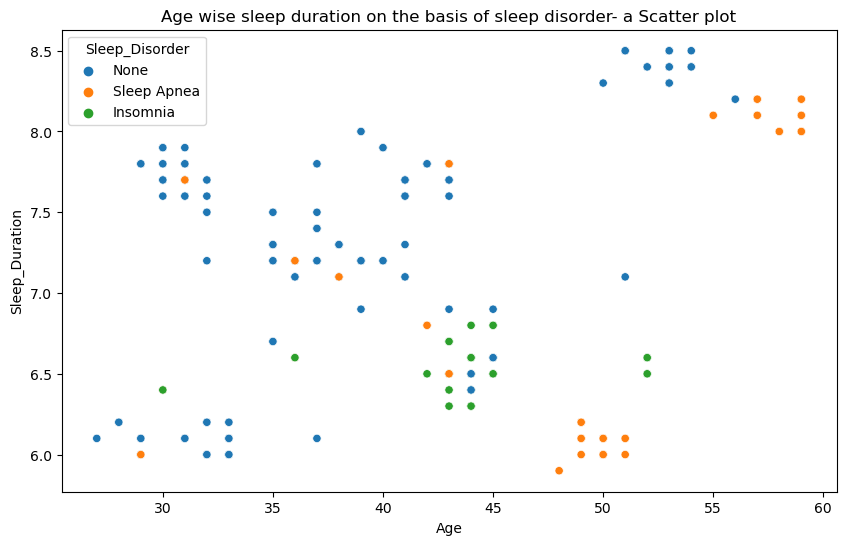

In [55]:
plt.figure(figsize=(10,6))
plt.title("Age wise sleep duration on the basis of sleep disorder- a Scatter plot")
sns.scatterplot(data=data, x='Age', y='Sleep_Duration', hue='Sleep_Disorder',color='brown')
plt.show()

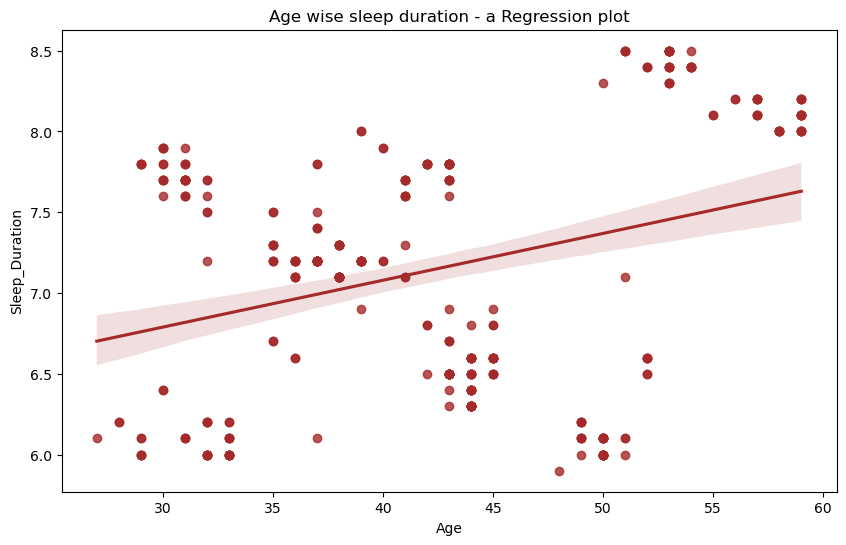

In [56]:
plt.figure(figsize=(10,6))
plt.title("Age wise sleep duration - a Regression plot")
sns.regplot(data=data, x='Age', y='Sleep_Duration', color='brown')
plt.show()

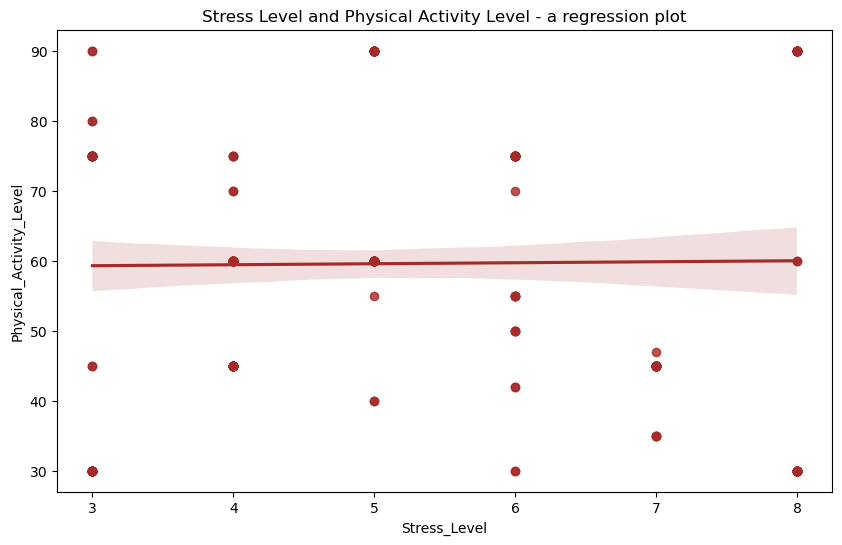

In [57]:
plt.figure(figsize=(10,6))
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity Level')
plt.title("Stress Level and Physical Activity Level - a regression plot")
sns.regplot(data=data, x='Stress_Level', y='Physical_Activity_Level', color='brown')
plt.show()

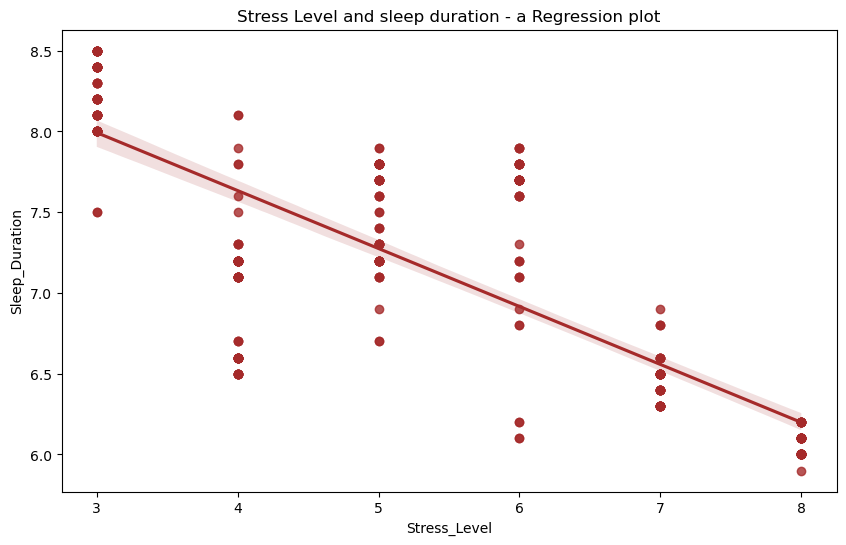

In [58]:
plt.figure(figsize=(10,6))
plt.xlabel('Stress Level')
plt.ylabel('Sleep_Duration')
plt.title("Stress Level and sleep duration - a Regression plot")
sns.regplot(data=data, x='Stress_Level', y='Sleep_Duration',color='brown')
plt.show()

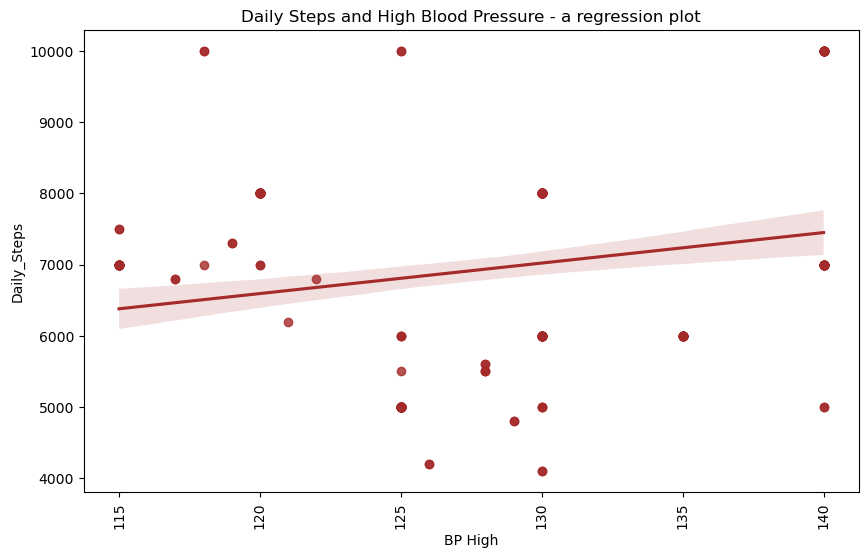

In [59]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.ylabel('Daily Steps')
plt.xlabel('High Blood Pressure')
plt.title("Daily Steps and High Blood Pressure - a regression plot")
sns.regplot(data=data, y='Daily_Steps', x='BP High', color='Brown')
plt.show()

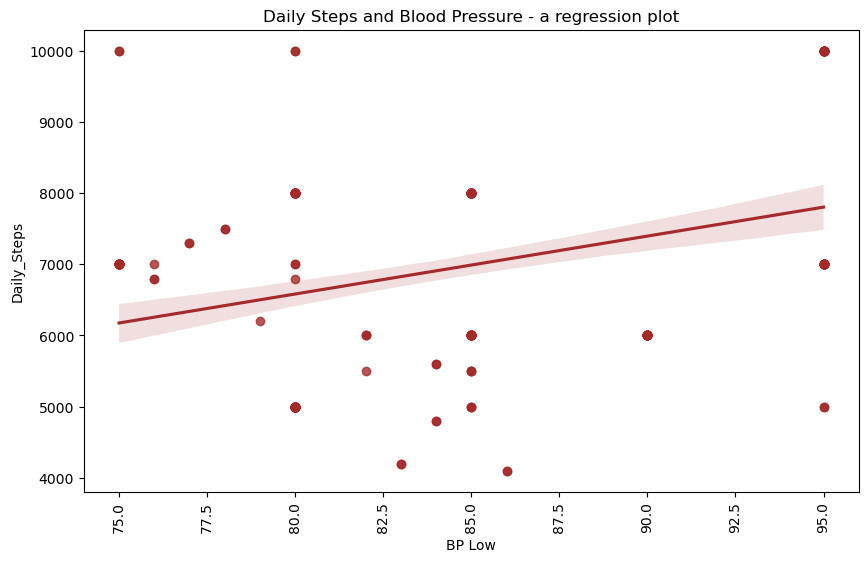

In [60]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.ylabel('Daily Steps')
plt.xlabel('Low Blood Pressure')
plt.title("Daily Steps and Blood Pressure - a regression plot")
sns.regplot(data=data, y='Daily_Steps', x='BP Low', color='Brown')
plt.show()

In [61]:
data = data [['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep',
       'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Heart_Rate',
       'Daily_Steps','BP High', 'BP Low','Sleep_Disorder']]

In [62]:
le = LabelEncoder()

In [63]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])

In [64]:
data.head(3)

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,BP High,BP Low,Sleep_Disorder
0,1,27,8,6.1,6,42,6,2,77.0,4200,126,83,1
1,1,28,1,6.2,6,60,8,0,75.0,10000,125,80,1
2,1,28,1,6.2,6,60,8,0,75.0,10000,125,80,1


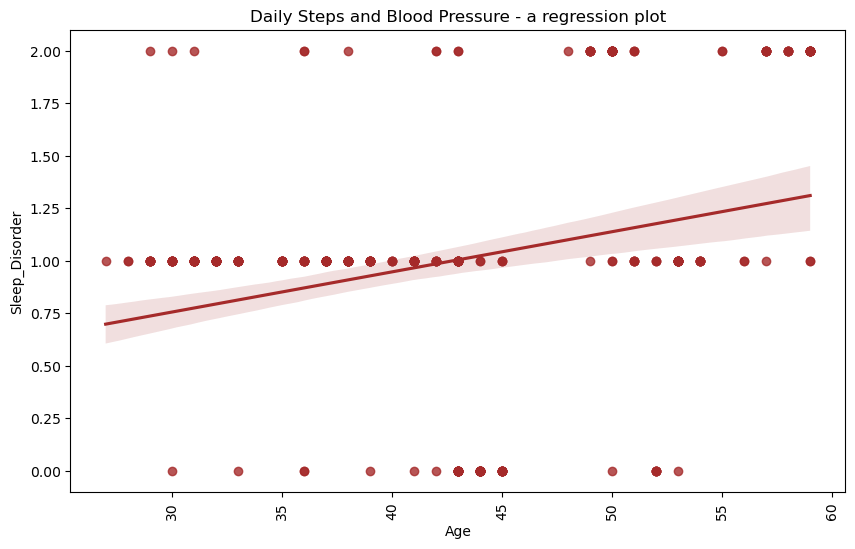

In [65]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Sleep_Disorder')
plt.title("Daily Steps and Blood Pressure - a regression plot")
sns.regplot(data=data, x='Age', y='Sleep_Disorder', color='Brown')
plt.show()

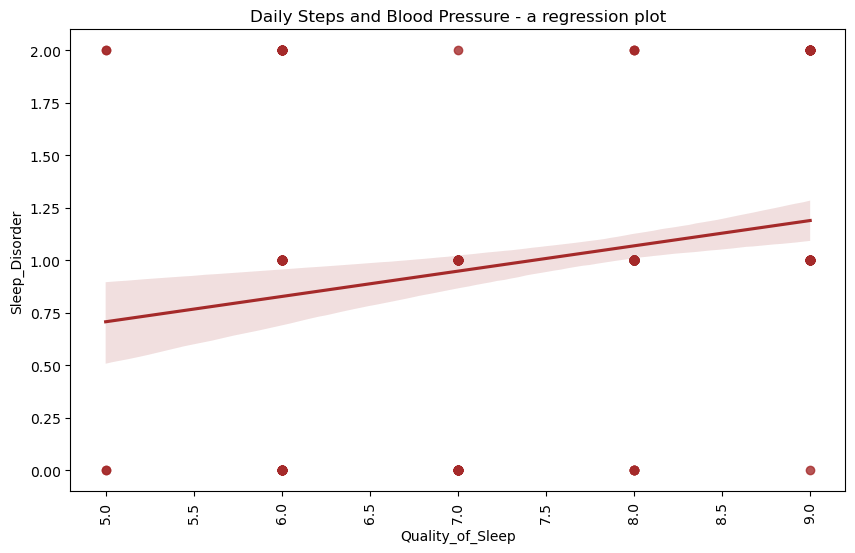

In [66]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep_Disorder')
plt.title("Daily Steps and Blood Pressure - a regression plot")
sns.regplot(data=data, x='Quality_of_Sleep', y='Sleep_Disorder', color='Brown')
plt.show()

In [67]:
x = data.iloc[:,:-1].values

In [68]:
x

array([[1.00e+00, 2.70e+01, 8.00e+00, ..., 4.20e+03, 1.26e+02, 8.30e+01],
       [1.00e+00, 2.80e+01, 1.00e+00, ..., 1.00e+04, 1.25e+02, 8.00e+01],
       [1.00e+00, 2.80e+01, 1.00e+00, ..., 1.00e+04, 1.25e+02, 8.00e+01],
       ...,
       [0.00e+00, 5.90e+01, 5.00e+00, ..., 7.00e+03, 1.40e+02, 9.50e+01],
       [0.00e+00, 5.90e+01, 5.00e+00, ..., 7.00e+03, 1.40e+02, 9.50e+01],
       [0.00e+00, 5.90e+01, 5.00e+00, ..., 7.00e+03, 1.40e+02, 9.50e+01]])

In [69]:
y = data.iloc[:,-1].values

In [70]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [71]:
sc = StandardScaler()

In [72]:
x = sc.fit_transform(x)

In [73]:
data.Sleep_Disorder.unique()

array([1, 2, 0])

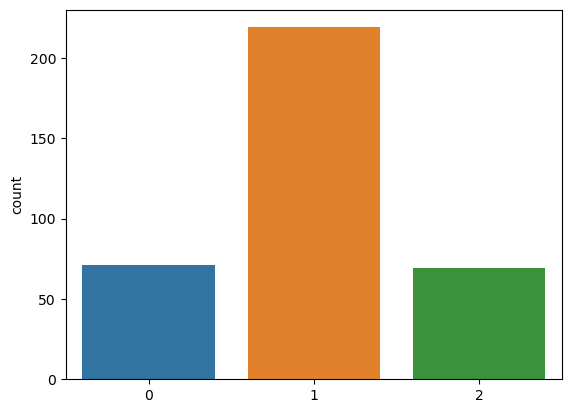

In [74]:
sns.countplot(x=y)
plt.show()

In [75]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier()

}

In [76]:
for name,model in models.items():
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=10, n_jobs=-1)
    print("Cross validation model: {}".format(name))
    print("Mean score: ",np.mean(scores)*100)
    print("*"*100)

Cross validation model: LogisticRegression
Mean score:  89.64285714285714
****************************************************************************************************
Cross validation model: DecisionTreeClassifier
Mean score:  73.8095238095238
****************************************************************************************************
Cross validation model: RandomForestClassifier
Mean score:  79.08730158730158
****************************************************************************************************
Cross validation model: KNeighborsClassifier
Mean score:  84.64285714285712
****************************************************************************************************
Cross validation model: AdaBoostClassifier
Mean score:  79.64285714285714
****************************************************************************************************
Cross validation model: GradientBoostingClassifier
Mean score:  76.30952380952381
**********************************

##### Here we can see that LogisticRegression has the highest mean score. 

In [77]:
model = LogisticRegression()

In [78]:
y= label_binarize(y, classes=[1.0, 2.0, 0.0])
n_classes = 3

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [80]:
clf = OneVsRestClassifier(LogisticRegression(random_state=42))
y_score = clf.fit(x_train, y_train).decision_function(x_test)

In [81]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [82]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

### Plotting ROC Curve for specific classes

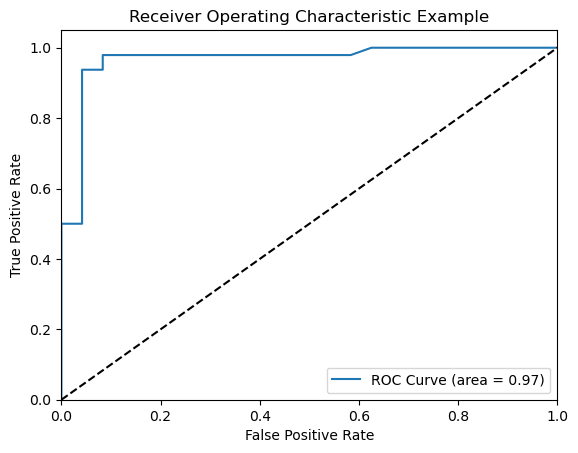

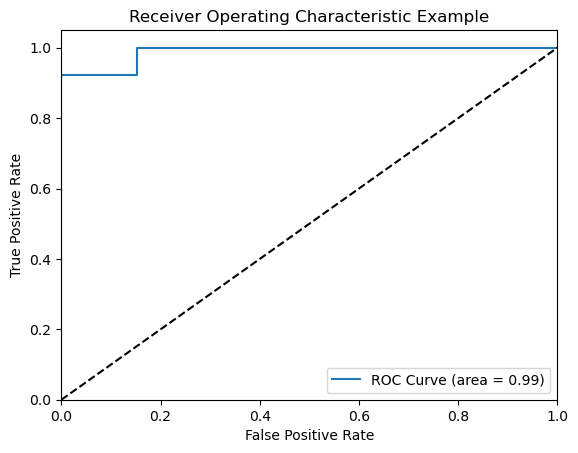

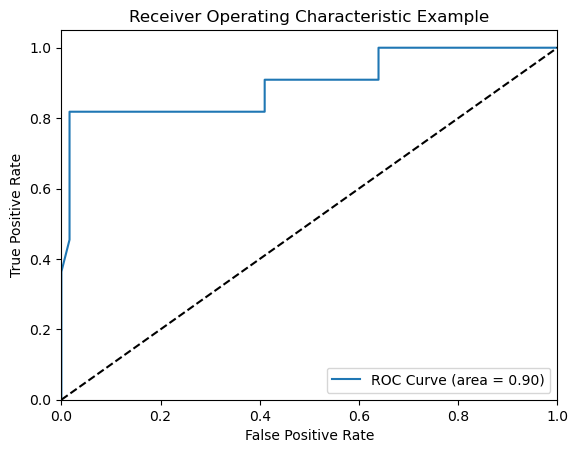

In [83]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i], label= 'ROC Curve (area = %0.2f)'%roc_auc[i])
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Example")
    plt.legend(loc="lower right")
    plt.show()